In [17]:
import re

In [18]:
import pandas as pd
data= pd.read_csv("new_data.csv", index_col=False)
data.rename(columns = { 'visitdate':'date','total':'assaults'}, inplace = True)

data['date']= pd.to_datetime(data.date)

print(data)



          date  assaults  male
0   2018-12-31         8     7
1   2019-01-01         3     2
2   2019-01-02         2     2
3   2019-01-03         2     2
4   2019-01-04         1     1
..         ...       ...   ...
275 2019-12-24         4     3
276 2019-12-26         3     2
277 2019-12-27         2     2
278 2019-12-28         1     1
279 2019-12-29         3     2

[280 rows x 3 columns]


In [19]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
import matplotlib.pyplot as plt

# new1 = pd.read_csv("anu.csv", index_col=False)
# new1.drop('Unnamed: 0', axis=1, inplace=True)
# new1['date']= pd.to_datetime(new1.date)

# num1= data.groupby('date').total.sum()


# num2= new1.groupby('date').counts.sum()
# num2= pd.DataFrame(num2)
# num2.reset_index()
# num1
df=[]
new1 = pd.read_csv("res1.csv", index_col=False)
new1['date']= pd.to_datetime(new1.date)
new1.drop('Unnamed: 0', axis=1, inplace=True)

df = pd.merge(new1, data,on= 'date', how= 'outer')
# print(df)

# df.drop(columns = df.columns[0], axis = 1, inplace= True)
# df.drop(columns = df.columns[3], axis = 1, inplace= True)

df= df.fillna(0)

df.rename(columns = { 'total':'assaults'}, inplace = True)

X= pd.read_csv("res2.csv", index_col=False)
X.drop('Unnamed: 0', axis=1, inplace=True)

X['date']= pd.to_datetime(X.date)
df = pd.merge(X, df,on= 'date', how= 'outer')


Y_count= pd.read_csv("res3.csv", index_col=False)
Y_count.drop('Unnamed: 0', axis=1, inplace=True)
Y_count['date']= pd.to_datetime(Tiger_count.date)
df = pd.merge(Y, df,on= 'date', how= 'outer')

Z_count= pd.read_csv("res4.csv", index_col=False)
Z_count.drop('Unnamed: 0', axis=1, inplace=True)
Z_count['date']= pd.to_datetime(Z_count.date)
df = pd.merge(Z_count, df,on= 'date', how= 'outer')




A= pd.read_csv("res5.csv", index_col=False)
A.drop('Unnamed: 0', axis=1, inplace=True)
A['date']= pd.to_datetime(A.date)
df = pd.merge(A, df,on= 'date', how= 'outer')




df= df.fillna(0)
df['all_sum']= df['res1']+ df['res2']+ df['res3']+df['res4']+df['res5']
df= df.fillna(0)
df['female'] = df['assaults']- df['male']
df

,date,res5,res4,res3,res2,res1,assaults,male,all_sum,female
0,2019-01-03,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0
1,2019-01-04,3.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,0.0
2,2019-01-06,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0
3,2019-01-07,1.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,1.0
4,2019-01-08,2.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...
353,2019-12-15,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0
354,2019-12-18,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
355,2019-12-22,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
356,2019-12-26,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0


In [20]:
df.describe()
mx= pd.DataFrame()

datey=[]
from datetime import date, timedelta

start_date = date(2019, 1, 1) 
end_date = date(2019, 12, 31)

delta = end_date - start_date  # as timedelta

# include the start and end day, if want to remove these 2 day, use range(1, delta.days) 
for i in range(delta.days + 1):  
    day = start_date + timedelta(days=i)
#     print(day.strftime("%Y-%m-%d"))
    datey.append(day)






In [21]:
datey
mx['date']= datey
mx['date']= pd.to_datetime(mx.date)

df = pd.merge(mx, df,on= 'date', how= 'outer')
df= df.fillna(0)
df.index=df.date
df.describe()


,res5,res4,res3,res2,res1,assaults,male,all_sum,female
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,0.661202,0.510929,0.040984,0.046448,1.038251,1.896175,1.467213,2.297814,0.428962
std,1.249646,0.728023,0.258474,0.267973,0.809980,1.785831,1.541309,1.736425,0.724622
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,2.000000,3.000000,2.000000,3.000000,1.000000
max,10.000000,4.000000,3.000000,3.000000,5.000000,11.000000,10.000000,11.000000,6.000000


In [22]:
df= df[:-1]
# df.to_csv('final_data')
# df.to_excel('final_data1.xlsx')

df['date']= pd.to_datetime(df.date)

df.loc[:,'weekend'] = df['date'].dt.day_name().isin(['Saturday', 'Sunday'])
# print(df)
df.describe()

# df.to_csv('tableau.csv')


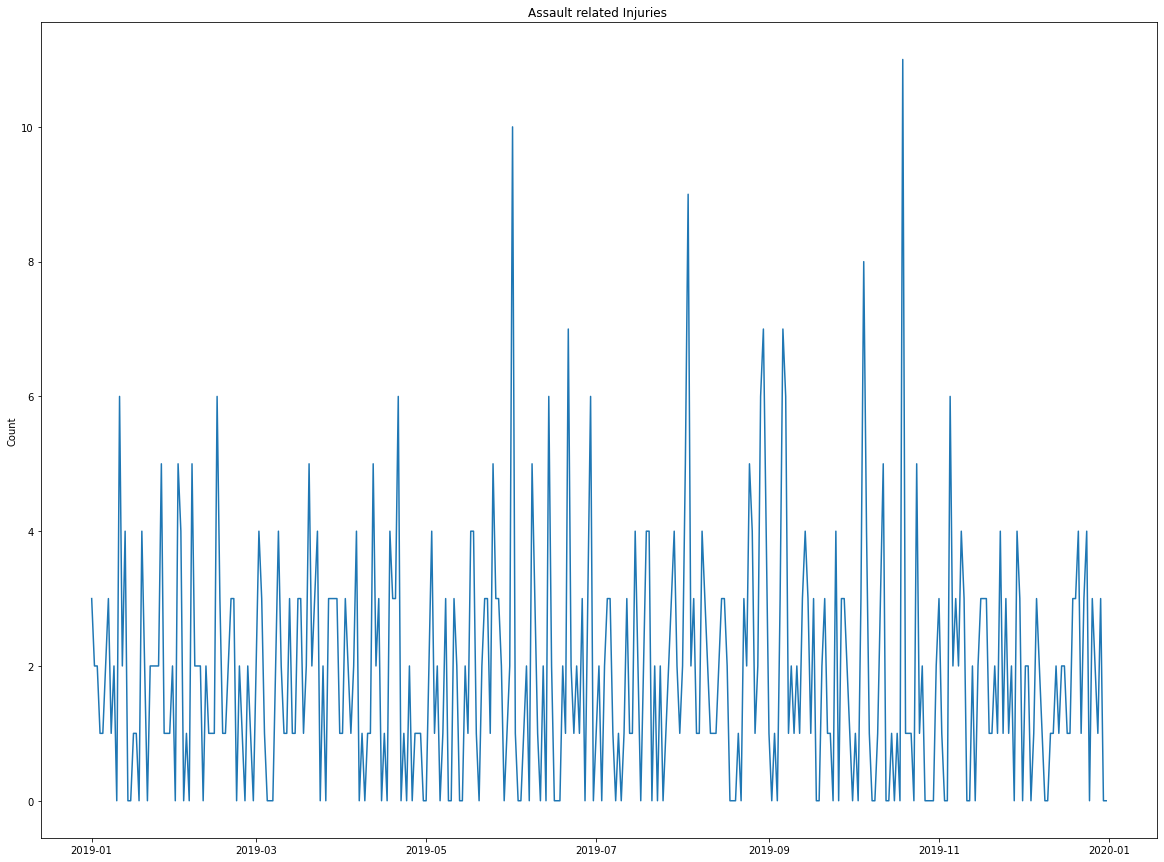

In [23]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize']= 20,15

Year = df['date']

Count = df['assaults']

plt.plot(Year, Count)


plt.title('Assault related Injuries ')
plt.ylabel('Count')

plt.show()




In [1]:
## Fitting data into Regression Models to find the best fit

In [25]:


import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt



#Create the training and testing data sets.
mask = np.random.rand(len(df)) <1
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

#Setup the regression expression in patsy notation. We are telling patsy that BB_COUNT is our dependent variable and
# it depends on the regression variables: DAY, DAY_OF_WEEK, MONTH, HIGH_T, LOW_T and PRECIP.
expr = """assaults ~ all_sum"""

#Set up the X and y matrices
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

#Print the training summary.
print(poisson_training_results.summary())

print(poisson_training_results.aic)
print(poisson_training_results.bic)

Training data set length=365
Testing data set length=0
                 Generalized Linear Model Regression Results                  
Dep. Variable:               assaults   No. Observations:                  365
Model:                            GLM   Df Residuals:                      363
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -679.59
Date:                Sun, 06 Nov 2022   Deviance:                       620.36
Time:                        12:00:53   Pearson chi2:                     598.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

C:\Users\c21098689\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1721: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


In [26]:
print('variance='+str(df['assaults'].var()))
print('mean='+str(df['assaults'].mean()))



variance=3.0953183802498847
mean=1.8794520547945206


In [27]:
## Modelling assault data to check for the best model 


import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF(True)


#create the training and testing data sets
mask = np.random.rand(len(df)) <1
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

#Setup the regression expression in patsy notation. We are telling patsy that BB_COUNT is our dependent variable and it depends on the regression variables: DAY, DAY_OF_WEEK, MONTH, HIGH_T, LOW_T and PRECIP
expr = """assaults ~ all_sum """

#Set up the X and y matrices for the training and testing data sets

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')
                           
#Using the statsmodels GLM class, train the Poisson regression model on the training data set
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

#print out the training summary
print(poisson_training_results.summary())

#print out the fitted rate vector
#print(poisson_training_results.mu)

#Add the λ vector as a new column called 'lam' to the Data Frame of the training data set
df_train['lam'] = poisson_training_results.mu

#add a derived column called 'OLS_DEP' to the pandas Data Frame. This new column will store the values of the dependent variable of the OLS regression
df_train['OLS_DEP'] = df_train.apply(lambda x: ((x['assaults'] -x['lam'])**2 -x['lam']) / x['lam'], axis=1)

#use patsy to form the model specification for the OLSR
olsr_expr = """OLS_DEP ~ lam -1"""

#Configure and fit the OLSR model
olsr_results = smf.ols(olsr_expr, df_train).fit()

#Print the regression params
#print(aux_olsr_results.params)

#train the NB2 model on the training data set
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=olsr_results.params[0])).fit()

#print the training summary

print(nb2_training_results.summary())


zip_training_results = sm.ZeroInflatedPoisson(endog=y_train, exog=X_train, exog_infl=X_train, inflation='logit').fit()



print(zip_training_results.summary())



print('Poisson model AIC result', poisson_training_results.aic)
print('Poisson model BIC result', poisson_training_results.bic)
print('NB2 model AIC result' , nb2_training_results.aic)
print('NB2 model BIC result', nb2_training_results.bic)
print('ZIP model AIC result', zip_training_results.aic)
print('ZIP model BIC result', zip_training_results.bic)

k1 = 4
l1 = -658.37
n1 = np.log(365)
BIC2 = k1*n1-2*l1
print(BIC2)


Training data set length=365
Testing data set length=0
                 Generalized Linear Model Regression Results                  
Dep. Variable:               assaults   No. Observations:                  365
Model:                            GLM   Df Residuals:                      363
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -679.59
Date:                Sun, 06 Nov 2022   Deviance:                       620.36
Time:                        12:00:53   Pearson chi2:                     598.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

C:\Users\c21098689\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
''' Since Generalized Poisson Regression Model Gives the best fit with the highest Log_likelihood value we continue using Generalised Poisson Regression Model 
Note: The P value for promotional data is >0.05 hence it does not affect assaults however All tweets data does '''

' Since Generalized Poisson Regression Model Gives the best fit with the highest Log_likelihood value we continue using Generalised Poisson Regression Model \nNote: The P value for promotional data is >0.05 hence it does not affect assaults however All tweets data does '

In [ ]:
print('variance='+str(df['assaults'].var()))
print('mean='+str(df['assaults'].mean()))


print('variance='+str(df['all_sum'].var()))
print('mean='+str(df['all_sum'].mean()))

In [ ]:
'''Male Assault Generalised Poisson Model'''
mask = np.random.rand(len(df)) < 1
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

#Setup the regression expression in Patsy notation.
#We are telling patsy that BB_COUNT is our dependent variable y and it depends on the regression variables X:
#DAY, DAY_OF_WEEK, MONTH, HIGH_T, LOW_T and PRECIP.
expr = 'assaults ~ all_sum'

#Let's use Patsy to carve out the X and y matrices for the training and testing data sets:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

#Print the training summary.
print(poisson_training_results.summary())

#Let's print out the variance and mean of the data set
print('variance='+str(df['assaults'].var()))
print('mean='+str(df['assaults'].mean()))

#Build Consul's Generalized Poison regression model, know as GP-1
gen_poisson_gp1 = sm.GeneralizedPoisson(y_train, X_train, p=1)

#Fit the model
gen_poisson_gp1_results = gen_poisson_gp1.fit()

#print the results
print(gen_poisson_gp1_results.summary())

#Get the model's predictions on the test data set
gen_poisson_gp1_predictions = gen_poisson_gp1_results.predict(X_test)

predicted_counts=gen_poisson_gp1_predictions
actual_counts = y_test['assaults']

fig = plt.figure()
fig.suptitle('Predicted versus actual assaults in Cardiff')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.ylabel(" Count of Assaults")
plt.xlabel("Year")
plt.show()

import math  
import sklearn.metrics  
  
mse = sklearn.metrics.mean_squared_error(actual_counts, predicted_counts)  
  
rmse = math.sqrt(mse)  

print(rmse)

In [ ]:
 df['female'].sum_na()


In [ ]:
## FeMales data


import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt



#Let's create the training and testing data sets.
mask = np.random.rand(len(df)) < 1
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

#Setup the regression expression in Patsy notation.
#We are telling patsy that female is our dependent variable y and it depends on the regression variables X:
#DAY, DAY_OF_WEEK, MONTH, HIGH_T, LOW_T and PRECIP.
expr = 'female ~ all_sum'

#Let's use Patsy to carve out the X and y matrices for the training and testing data sets:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

#Print the training summary.
print(poisson_training_results.summary())

#Let's print out the variance and mean of the data set
print('variance='+str(df['female'].var()))
print('mean='+str(df['female'].mean()))

#Build Consul's Generalized Poison regression model, know as GP-1
gen_poisson_gp1 = sm.GeneralizedPoisson(y_train, X_train, p=1)

#Fit the model
gen_poisson_gp1_results = gen_poisson_gp1.fit()

#print the results
print(gen_poisson_gp1_results.summary())

#Get the model's predictions on the test data set
gen_poisson_gp1_predictions = gen_poisson_gp1_results.predict(X_test)

predicted_counts=gen_poisson_gp1_predictions
actual_counts = y_test['female']

fig = plt.figure()
fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [ ]:
'''Male injury Generalised Poisson Model'''
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

#Setup the regression expression in Patsy notation.
#We are telling patsy that BB_COUNT is our dependent variable y and it depends on the regression variables X:
#DAY, DAY_OF_WEEK, MONTH, HIGH_T, LOW_T and PRECIP.
expr = 'male_unscheduled_injury ~ all_sum+ weekend'

#Let's use Patsy to carve out the X and y matrices for the training and testing data sets:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

#Print the training summary.
print(poisson_training_results.summary())

#Let's print out the variance and mean of the data set
print('variance='+str(df['male_unscheduled_injury'].var()))
print('mean='+str(df['male_unscheduled_injury'].mean()))

#Build Consul's Generalized Poison regression model, know as GP-1
gen_poisson_gp1 = sm.GeneralizedPoisson(y_train, X_train, p=1)

#Fit the model
gen_poisson_gp1_results = gen_poisson_gp1.fit()

#print the results
print(gen_poisson_gp1_results.summary())

#Get the model's predictions on the test data set
gen_poisson_gp1_predictions = gen_poisson_gp1_results.predict(X_test)

predicted_counts=gen_poisson_gp1_predictions
actual_counts = y_test['male_unscheduled_injury']

fig = plt.figure()
fig.suptitle('Predicted versus actual assaults in Cardiff')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.ylabel(" Count of Assaults")
plt.xlabel("Year")
plt.show()

import math  
import sklearn.metrics  
  
mse = sklearn.metrics.mean_squared_error(actual_counts, predicted_counts)  
  
rmse = math.sqrt(mse)  

print(rmse)

In [ ]:
df['f_unscheduled_injury']= df['unscheduled_injury']- df['female']
df

In [ ]:
''' Unscheduled female injury Generalised Poisson Model'''


mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

#Setup the regression expression in Patsy notation.
#We are telling patsy that BB_COUNT is our dependent variable y and it depends on the regression variables X:
#DAY, DAY_OF_WEEK, MONTH, HIGH_T, LOW_T and PRECIP.
expr = 'f_unscheduled_injury ~ all_sum+ weekend'

#Let's use Patsy to carve out the X and y matrices for the training and testing data sets:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

#Print the training summary.
print(poisson_training_results.summary())

#Let's print out the variance and mean of the data set
print('variance='+str(df['f_unscheduled_injury'].var()))
print('mean='+str(df['f_unscheduled_injury'].mean()))

#Build Consul's Generalized Poison regression model, know as GP-1
gen_poisson_gp1 = sm.GeneralizedPoisson(y_train, X_train, p=1)

#Fit the model
gen_poisson_gp1_results = gen_poisson_gp1.fit()

#print the results
print(gen_poisson_gp1_results.summary())

#Get the model's predictions on the test data set
gen_poisson_gp1_predictions = gen_poisson_gp1_results.predict(X_test)

predicted_counts=gen_poisson_gp1_predictions
actual_counts = y_test['f_unscheduled_injury']

fig = plt.figure()
fig.suptitle('Predicted versus actual assaults in Cardiff')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.ylabel(" Count of Assaults")
plt.xlabel("Year")
plt.show()

import math  
import sklearn.metrics  
  
mse = sklearn.metrics.mean_squared_error(actual_counts, predicted_counts)  
  
rmse = math.sqrt(mse)  

print(rmse)

In [ ]:
df['Quarter']= df.date.dt.quarter
df['Quarter']= pd.Categorical(df.Quarter)

In [ ]:
## Modelling all promotional data quaterly


import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


#create the training and testing data sets
mask = np.random.rand(len(df)) < 1
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

#Setup the regression expression in patsy notation. We are telling patsy that BB_COUNT is our dependent variable and it depends on the regression variables: DAY, DAY_OF_WEEK, MONTH, HIGH_T, LOW_T and PRECIP
expr = """all_sum ~  Quarter"""
#Set up the X and y matrices for the training and testing data sets
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

#Using the statsmodels GLM class, train the Poisson regression model on the training data set
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

#print out the training summary
print(poisson_training_results.summary())

#print out the fitted rate vector
##print(poisson_training_results.mu)

#Add the λ vector as a new column called 'lam' to the Data Frame of the training data set
df_train['lam'] = poisson_training_results.mu

#add a derived column called 'AUX_OLS_DEP' to the pandas Data Frame. This new column will store the values of the dependent variable of the OLS regression
df_train['AUX_OLS_DEP'] = df_train.apply(lambda x: ((x['all_sum'] -x['lam'])**2 -x['lam']) / x['lam'], axis=1)

#use patsy to form the model specification for the OLSR
ols_expr = """AUX_OLS_DEP ~ lam -1"""

#Configure and fit the OLSR model
aux_olsr_results = smf.ols(ols_expr, df_train).fit()

#Print the regression params
print(aux_olsr_results.params)

#train the NB2 model on the training data set
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()

#print the training summary

print(nb2_training_results.summary())




In [ ]:

  
print("The difference between actual and predicted values", rmse)  
print('1.2997595246004645')



In [ ]:
demo =  df[df['weekend']== True]
demo

#Let's create the training and testing data sets.
mask = np.random.rand(len(demo)) < 0.8
df_train = demo[mask]
df_test = demo[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

#Setup the regression expression in Patsy notation.
#We are telling patsy that BB_COUNT is our dependent variable y and it depends on the regression variables X:
#DAY, DAY_OF_WEEK, MONTH, HIGH_T, LOW_T and PRECIP.
expr = 'male~ all_sum'

#Let's use Patsy to carve out the X and y matrices for the training and testing data sets:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

#Print the training summary.
print(poisson_training_results.summary())

#Let's print out the variance and mean of the data set
print('variance='+str(df['male'].var()))
print('mean='+str(df['male'].mean()))

#Build Consul's Generalized Poison regression model, know as GP-1
gen_poisson_gp1 = sm.GeneralizedPoisson(y_train, X_train, p=1)

#Fit the model
gen_poisson_gp1_results = gen_poisson_gp1.fit()

#print the results
print(gen_poisson_gp1_results.summary())

#Get the model's predictions on the test data set
gen_poisson_gp1_predictions = gen_poisson_gp1_results.predict(X_test)

predicted_counts=gen_poisson_gp1_predictions
actual_counts = y_test['male']

fig = plt.figure()
fig.suptitle('Predicted versus actual assaults in Cardiff')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.ylabel(" Count of Assaults")
plt.xlabel("Year")
plt.show()

import math  
import sklearn.metrics  
  
mse = sklearn.metrics.mean_squared_error(actual_counts, predicted_counts)  
  
rmse = math.sqrt(mse)  
  
print("The difference between actual and predicted values", rmse)  



print('1.2997595246004645')